In [238]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Starting with Train.csv 💪

In [239]:
data = pd.read_csv("data/train.csv")
df = data.copy()

### Some infos from train.csv 📓

In [240]:
df.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False


In [241]:
df.tail(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False
8692,9280_02,Europa,False,E/608/S,TRAPPIST-1e,44.0,False,126.0,4688.0,0.0,0.0,12.0,Propsh Hontichre,True


In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [243]:
print(f"Shape of Train.csv: {df.shape}")

Shape of Train.csv: (8693, 14)


8693 linhas e 14 colunas

In [244]:
df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

#### Numerical features 🔢

In [245]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,8514.0,28.827930,14.489021,0.0,19.0,27.0,38.0,79.0
RoomService,8512.0,224.687617,666.717663,0.0,0.0,0.0,47.0,14327.0
FoodCourt,8510.0,458.077203,1611.489240,0.0,0.0,0.0,76.0,29813.0
ShoppingMall,8485.0,173.729169,604.696458,0.0,0.0,0.0,27.0,23492.0
Spa,8510.0,311.138778,1136.705535,0.0,0.0,0.0,59.0,22408.0
VRDeck,8505.0,304.854791,1145.717189,0.0,0.0,0.0,46.0,24133.0


---
> Idade: 
- Mean: 29 anos; 
- Min: 0 anos (?); 
- Max: 79 anos.

> RoomService: 
- Mean: 224; 
- Min: 0 (?); 
- Max: 14237.

> FoodCourt:
- Mean: 458;
- Min: 0 (?);
- Max: 29813.

> ShoppingMall:
- Mean: 173;
- Min: 0 (?);
- Max: 23492.

> Spa
- Mean: 311;
- Min: 0 (?);
- Max: 22408.

>VRDeck
- Mean: 304;
- Min: 0 (?);
- Max: 24133.



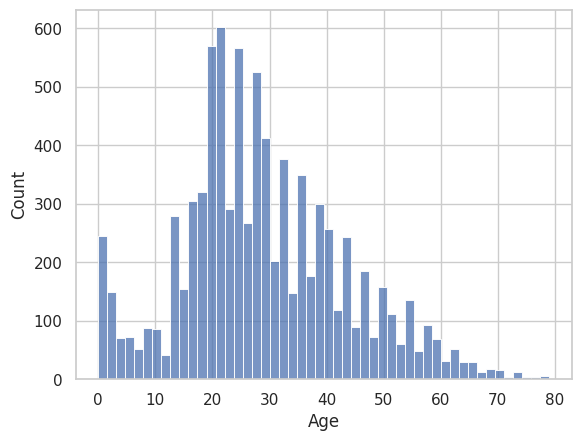

In [246]:
sns.histplot(df['Age'], color='b', bins=50);

#### Cathegorical features 🔤

In [247]:
df.describe(include=object)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,8693,8492,8476,8494,8511,8490,8493
unique,8693,3,2,6560,3,2,8473
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall
freq,1,4602,5439,8,5915,8291,2


---

> Cabin
- A cabine G/734/S é, provavelmente, a mais lotada.

> VIP
- A maioria esmagadora dos tripulantes (~8200) não pagaram pelo serviço VIP

> Name
- Existe um nome que se repete duas vezes no conjunto: 'Gollux Reedall'

#### Unique values ☝

In [248]:
print(f"Unique values of df[HomePlanet] is: {df['HomePlanet'].unique()}\n")
print(f"Unique values of df[Destination] is: {df['Destination'].unique()}\n")

Unique values of df[HomePlanet] is: ['Europa' 'Earth' 'Mars' nan]

Unique values of df[Destination] is: ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan]



#### Distribution of the values ➗

In [249]:
for col in df.columns:
  if len(df[col].unique()) <= 4:
    print(f"In the df['{col}'] the value counts is:\n{df[col].value_counts()}\n-------")

In the df['HomePlanet'] the value counts is:
HomePlanet
Earth     4602
Europa    2131
Mars      1759
Name: count, dtype: int64
-------
In the df['CryoSleep'] the value counts is:
CryoSleep
False    5439
True     3037
Name: count, dtype: int64
-------
In the df['Destination'] the value counts is:
Destination
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: count, dtype: int64
-------
In the df['VIP'] the value counts is:
VIP
False    8291
True      199
Name: count, dtype: int64
-------
In the df['Transported'] the value counts is:
Transported
True     4378
False    4315
Name: count, dtype: int64
-------


---
- The column 'VIP': this set have only 199 VIP's tripulants
- The column 'CryoSleep: 3037 peoples did the CryoSleep
- The column 'Transported': Values are almost equal

### Data treatment 🧰 

#### Cleaning missing data 🧹

In [250]:
df_fill = df.dropna(subset=["Cabin", "PassengerId", "Name", "Transported"])
df_fill = df_fill.reset_index().drop(labels = "index", axis=1)

In [251]:
columns_list = df_fill.columns[:-1]

for col in columns_list:
  if df_fill[col].dtypes != np.float64:
    df_fill = df_fill.fillna(value={col:"uncat"})
  else:
    print(col, df_fill[col].mean())
    df_fill = df_fill.fillna({col:df_fill[col].mean()})

Age 28.835425898572133
RoomService 221.24532019704432
FoodCourt 457.77619106241536
ShoppingMall 172.7763775636274
Spa 306.99088782169684
VRDeck 303.18494332183343


In [252]:
df_fill.tail(15)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
8281,9267_01,Europa,True,E/607/S,TRAPPIST-1e,21.0,False,0.0,0.0,0.0,0.0,0.0,Arraid Opshaft,True
8282,9267_02,Europa,True,E/607/S,TRAPPIST-1e,20.0,False,0.0,0.0,0.0,0.0,0.0,Sabi Opshaft,True
8283,9268_01,Earth,True,G/1505/P,TRAPPIST-1e,31.0,False,0.0,0.0,0.0,0.0,0.0,Agnesa Baldson,True
8284,9270_01,Earth,True,G/1497/S,55 Cancri e,33.0,False,0.0,0.0,0.0,0.0,0.0,Lan Mckinsond,True
8285,9272_01,Earth,False,G/1507/P,TRAPPIST-1e,26.0,False,240.0,242.0,510.0,0.0,0.0,Ireene Simson,True
8286,9272_02,Earth,False,F/1894/P,TRAPPIST-1e,21.0,False,86.0,3.0,149.0,208.0,329.0,Gordo Simson,False
8287,9274_01,uncat,True,G/1508/P,TRAPPIST-1e,23.0,False,0.0,0.0,0.0,0.0,0.0,Chelsa Bullisey,True
8288,9275_01,Europa,False,A/97/P,TRAPPIST-1e,0.0,False,0.0,0.0,0.0,0.0,0.0,Polaton Conable,True
8289,9275_02,Europa,False,A/97/P,TRAPPIST-1e,32.0,False,1.0,1146.0,0.0,50.0,34.0,Diram Conable,False
8290,9275_03,Europa,uncat,A/97/P,TRAPPIST-1e,30.0,False,0.0,3208.0,0.0,2.0,330.0,Atlasym Conable,True


In [253]:
df_fill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8296 entries, 0 to 8295
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8296 non-null   object 
 1   HomePlanet    8296 non-null   object 
 2   CryoSleep     8296 non-null   object 
 3   Cabin         8296 non-null   object 
 4   Destination   8296 non-null   object 
 5   Age           8296 non-null   float64
 6   VIP           8296 non-null   object 
 7   RoomService   8296 non-null   float64
 8   FoodCourt     8296 non-null   float64
 9   ShoppingMall  8296 non-null   float64
 10  Spa           8296 non-null   float64
 11  VRDeck        8296 non-null   float64
 12  Name          8296 non-null   object 
 13  Transported   8296 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 850.8+ KB


In [254]:
df_fill.shape

(8296, 14)

#### Feature engineering 

In [255]:
new_col_board = []
new_col_deck = []
new_col_num = []
for room in df_fill['Cabin']:
  aux = room.split("/")
  if aux[-1] == 'P':
    new_col_board.append(int("0"))
    aux.pop(-1)
  if aux[-1] == 'S':
    new_col_board.append(int("1"))
    aux.pop(-1)
  new_col_deck.append(str(aux[0]))
  aux.pop(0)
  new_col_num.append(int(aux[0]))

df_fill.drop('Cabin', axis=1, inplace=True)
df_fill['Deck'] = new_col_deck
df_fill['NumCabin'] = new_col_num
df_fill['Side'] = new_col_board

0 to Port side and 1 to starboard side

In [256]:
df_fill['Deck'].unique()

array(['B', 'F', 'A', 'G', 'E', 'C', 'D', 'T'], dtype=object)

In [257]:
df_fill.HomePlanet=df_fill.HomePlanet.map({'Europa':0,'Earth':1,'Mars':2,'uncat':3})
df_fill.Destination=df_fill.Destination.map({'TRAPPIST-1e':0,'PSO J318.5-22':1,'55 Cancri e':2, 'uncat':3})
df_fill.Deck=df_fill.Deck.map({'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6,'T':7})

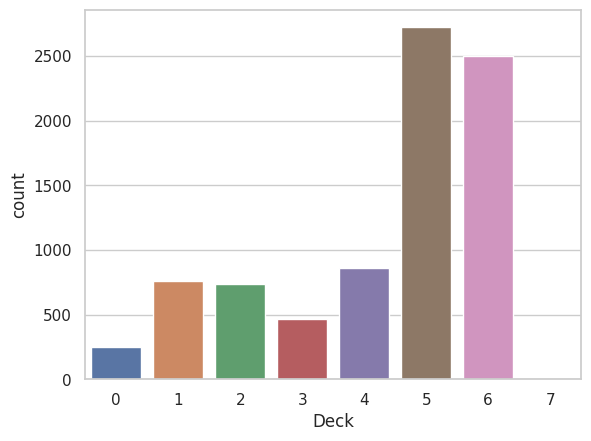

In [258]:
sns.countplot(data=df_fill, x=df_fill['Deck']);

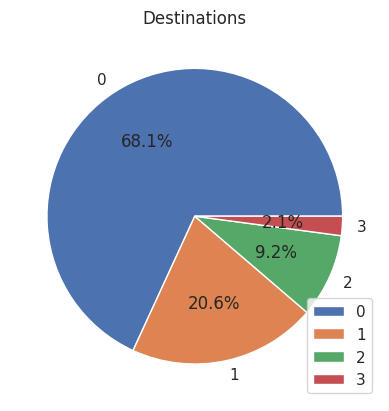

In [259]:
plt.title("Destinations")
plt.pie(x = df_fill['Destination'].value_counts(), labels = df_fill['Destination'].unique(), autopct='%1.1f%%')
plt.legend(loc='lower right')
plt.show()

In [260]:
df_fill["CryoSleep"].replace(False,0,inplace=True)
df_fill["CryoSleep"].replace(True,1,inplace=True)
df_fill["CryoSleep"].replace("uncat",2,inplace=True)

df_fill["VIP"].replace(False,0,inplace=True)
df_fill["VIP"].replace(True,1,inplace=True)
df_fill["VIP"].replace("uncat",2,inplace=True)

df_fill["Transported"].replace(False,0,inplace=True)
df_fill["Transported"].replace(True,1,inplace=True)
df_fill["Transported"].replace("uncat",2,inplace=True)

In [261]:
df_fill.tail(5)

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,NumCabin,Side
8291,9276_01,0,0,2,41.0,1,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,0,0,98,0
8292,9278_01,1,1,1,18.0,0,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,0,6,1499,1
8293,9279_01,1,0,0,26.0,0,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,1,6,1500,1
8294,9280_01,0,0,2,32.0,0,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,0,4,608,1
8295,9280_02,0,0,0,44.0,0,126.0,4688.0,0.0,0.0,12.0,Propsh Hontichre,1,4,608,1


In [262]:
aux_list = []
aux_list2 = []
fml_col = []

for name in df_fill['Name']:
  surname = name.split(" ")
  aux_list.append(surname[-1])
for i, surnames in enumerate(aux_list):
  try:
    if aux_list[i] == aux_list[i+1] or aux_list[i] == aux_list[i-1]:
      fml_col.append(int("1"))
      continue
    else:
      fml_col.append(int("0"))
      continue
  except:
    if aux_list[i] == aux_list[i-1]:
      fml_col.append(int("1"))
      continue
    else:
      fml_col.append(int("0"))
      continue
df_fill['FamilyTravelling'] = fml_col

In [263]:
new_col = []
for col in df_fill['Age']:
  if col <= 18:
    new_col.append("child")
  elif col > 18 and col <= 60:
    new_col.append("adult")
  elif col > 60:
    new_col.append("elderly")
# print(len(new_col))
df_fill = df_fill.assign(Age = new_col)

In [264]:
df_fill["Age"].replace("child",0,inplace=True)
df_fill["Age"].replace("adult",1,inplace=True)
df_fill["Age"].replace("elderly",2,inplace=True)

##### Experimenting... 🧪

In [265]:
df_test = df_fill.copy()

In [280]:
corr_cryo = ((df_test["CryoSleep"] == 1) & (df_test["Transported"] == 1))
count = []
for corr in corr_cryo:
    if corr == True:
        count.append(1)
print(f"Total of passengers in CryoSleep who went is {len(count)}")

Total of passengers in CryoSleep who went is 2366


In [267]:
df_test["Cryo&Transported"] = corr_cryo

df_test["Cryo&Transported"].replace(False,0,inplace=True)
df_test["Cryo&Transported"].replace(True,1,inplace=True)

In [277]:
corr_spending = ((df_test["CryoSleep"] == 1) & (df_test["FoodCourt"] == 0) & (df_test["ShoppingMall"] == 0) & (df_test["Spa"] == 0) & (df_test["VRDeck"] == 0))
count = []
for corr in corr_spending:
    if corr == True:
        count.append(1)
print(len(count))

2625


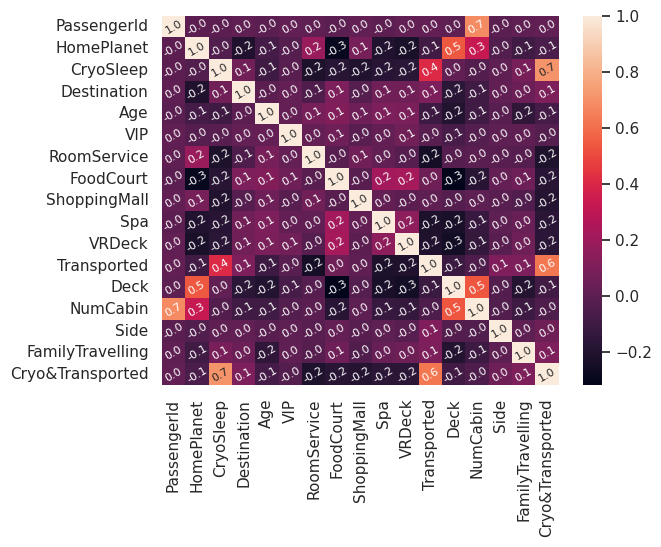

In [272]:
sns.heatmap(df_test.drop(columns=['Name'], axis=1).corr(), annot=True, annot_kws={'size': 8, 'rotation': 30}, fmt=".1f");

In [278]:
for col in df_test.columns:
  if len(df_test[col].unique()) <= 4:
    print(f"In the df['{col}'] the value counts is:\n{df_test[col].value_counts()}\n-------")

In the df['HomePlanet'] the value counts is:
HomePlanet
1    4403
0    2024
2    1681
3     188
Name: count, dtype: int64
-------
In the df['CryoSleep'] the value counts is:
CryoSleep
0    5205
1    2891
2     200
Name: count, dtype: int64
-------
In the df['Destination'] the value counts is:
Destination
0    5653
2    1707
1     761
3     175
Name: count, dtype: int64
-------
In the df['Age'] the value counts is:
Age
1    6321
0    1768
2     207
Name: count, dtype: int64
-------
In the df['VIP'] the value counts is:
VIP
0    7910
2     196
1     190
Name: count, dtype: int64
-------
In the df['Transported'] the value counts is:
Transported
1    4177
0    4119
Name: count, dtype: int64
-------
In the df['Side'] the value counts is:
Side
1    4184
0    4112
Name: count, dtype: int64
-------
In the df['FamilyTravelling'] the value counts is:
FamilyTravelling
0    5144
1    3152
Name: count, dtype: int64
-------
In the df['Cryo&Transported'] the value counts is:
Cryo&Transported
0    593

In [268]:
df_test.head(3)

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,NumCabin,Side,FamilyTravelling,Cryo&Transported
0,0001_01,0,0,0,1,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,1,0,0,0,0
1,0002_01,1,0,0,1,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,5,0,1,0,0
2,0003_01,0,0,0,1,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,0,0,1,1,0


##### Continue...

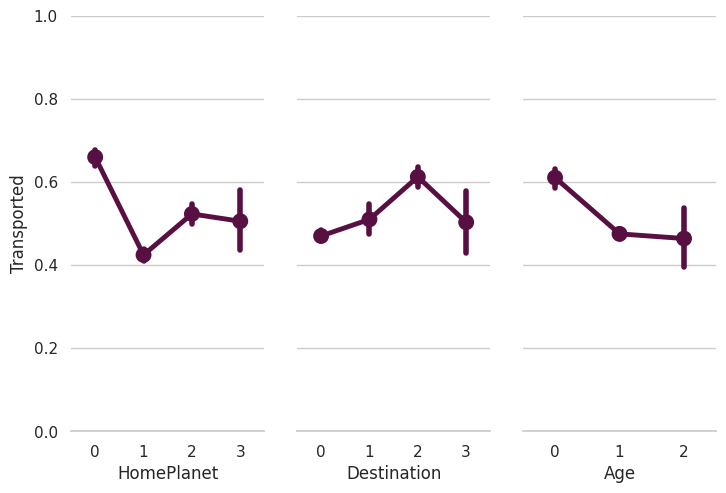

In [269]:
sns.set_theme(style="whitegrid")
g = sns.PairGrid(df_fill, y_vars="Transported",
                 x_vars=["HomePlanet", "Destination", "Age"],
                 height=5, aspect=.5)

# Draw a seaborn pointplot onto each Axes
g.map(sns.pointplot, scale=1.3, errwidth=4, color="xkcd:plum")
g.set(ylim=(0, 1))
sns.despine(fig=g.fig, left=True)

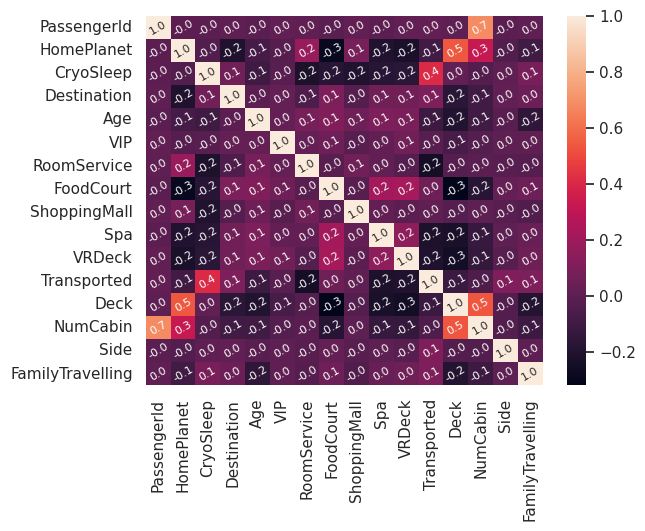

In [270]:
sns.heatmap(df_fill.drop(columns=['Name'], axis=1).corr(), annot=True, annot_kws={'size': 8, 'rotation': 30}, fmt=".1f");

In [271]:
df_fill.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,NumCabin,Side,FamilyTravelling
0,0001_01,0,0,0,1,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,1,0,0,0
1,0002_01,1,0,0,1,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,5,0,1,0
2,0003_01,0,0,0,1,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,0,0,1,1
3,0003_02,0,0,0,1,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,0,0,1,1
4,0004_01,1,0,0,0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,5,1,1,0
